In [8]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

In [215]:
# Load the Diabetes dataset
columns = 'age sex bmi map tc ldl hdl tch ltg glu'.split() # Declare the columns names
diabetes = datasets.load_diabetes() # Call the diabetes dataset from sklearn
df = pd.DataFrame(diabetes.data, columns=columns) # load the dataset as a pandas data frame
y1 = diabetes.target # define the target variable (dependent variable) as y
y=y1

In [216]:
df.head(), y1

(        age       sex       bmi       map        tc       ldl       hdl  \
 0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
 1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
 2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
 3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
 4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
 
         tch       ltg       glu  
 0 -0.002592  0.019908 -0.017646  
 1 -0.039493 -0.068330 -0.092204  
 2 -0.002592  0.002864 -0.025930  
 3  0.034309  0.022692 -0.009362  
 4 -0.002592 -0.031991 -0.046641  ,
 array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75

In [8]:
y[:5]

array([151.,  75., 141., 206., 135.])

In [14]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


In [16]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [8]:
predictions[0:5]

array([104.51164901, 158.42814434, 167.48757323, 160.10361555,
       203.32224444])

Text(0, 0.5, 'Predictions')

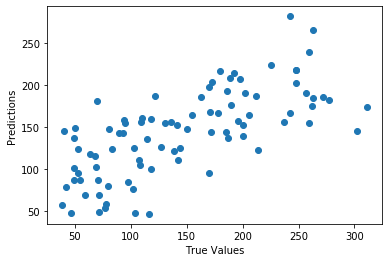

In [11]:
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [24]:
print ('Test RMSE:', np.sqrt(mean_squared_error(predictions, y_test)))
print ('Train RMSE:', np.sqrt(mean_squared_error(lm.predict(X_train), y_train)))

Test RMSE: 52.55849499311389
Train RMSE: 53.8968340273753


# Cross Validation

In [30]:
from sklearn.model_selection import KFold # import KFold
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]]) # create an array
y = np.array([1, 2, 3, 4]) # Create another array
kf = KFold(n_splits=2) # Define the split - into 2 folds 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator

2

In [58]:
print(kf) 

KFold(n_splits=2, random_state=None, shuffle=False)


In [31]:
for train_index, test_index in kf.split(X):
    print('TRAIN:', train_index, 'TEST:', test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
X_train, X_test,y_train, y_test

TRAIN: [2 3] TEST: [0 1]
TRAIN: [0 1] TEST: [2 3]


(array([[1, 2],
        [3, 4]]),
 array([[1, 2],
        [3, 4]]),
 array([1, 2]),
 array([3, 4]))

### LOOCV

In [62]:
from sklearn.model_selection import LeaveOneOut 
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]]) # create an array
y = np.array([1, 2, 3, 4]) # Create another array
loo = LeaveOneOut()
loo.get_n_splits(X)


for train_index, test_index in loo.split(X):
    print('TRAIN:', train_index, 'TEST:', test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [1 2 3] TEST: [0]
TRAIN: [0 2 3] TEST: [1]
TRAIN: [0 1 3] TEST: [2]
TRAIN: [0 1 2] TEST: [3]


In [210]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [19]:
# Perform 6-fold cross validation
scores = cross_val_score(model, df, y, cv=6)
print ('Cross-validated scores:', scores)

Cross-validated scores: [0.4554861  0.46138572 0.40094084 0.55220736 0.43942775 0.56923406]


In [18]:
?cross_val_score

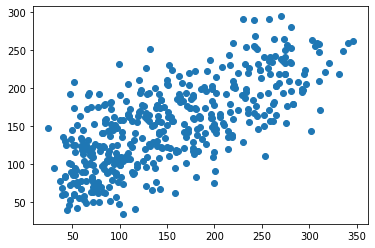

In [71]:
# Make cross validated predictions
predictions = cross_val_predict(model, df, y, cv=10)
plt.scatter(y, predictions)

In [74]:
np.sqrt(mean_squared_error(y,predictions))

54.76342105528678

# tasks 

##### Find out cross validation results without using cross_val_predict

In [16]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3) 


list_split=[]


for train_index, test_index in kf.split(df):
       list_split.append([train_index,test_index])
 


In [17]:
list_pred=[]

for i in range(len(list_split)):
  
    reg = linear_model.LinearRegression()
    model = reg.fit(df.iloc[list_split[i][0]], y[list_split[i][0]])
    predictions = reg.predict(df.iloc[list_split[i][1]])
    
    list_pred.extend(predictions)


list_pred

#predictions = cross_val_predict(model, df, y, cv=2)
#len(predictions)


[210.50511237181234,
 67.6007143299554,
 185.3804203945591,
 157.15946162536034,
 127.39261469689127,
 93.39315985011851,
 73.01117688889221,
 134.85818880028873,
 167.3033588192754,
 199.06368190943022,
 78.53295255876174,
 110.86176176795448,
 113.02746056707575,
 164.62145828474078,
 105.88380046391491,
 183.99207510505545,
 204.1054410814486,
 191.99288218380713,
 140.75185485783211,
 118.44342378352934,
 106.78705428096657,
 83.73033715458416,
 106.26755362983818,
 241.44978117738447,
 161.13694323474803,
 145.50444630957853,
 77.54594172005982,
 172.64543356144043,
 125.22001850588761,
 178.91015805586724,
 153.3438946202765,
 59.89530993830665,
 273.5354171156955,
 105.55272715976241,
 73.65701358765064,
 92.10769925348018,
 200.3566338406755,
 149.9414219585907,
 247.01257707201154,
 138.83767919495978,
 157.3139544389885,
 58.635591934773345,
 143.63538097674228,
 74.08015284308621,
 229.8690542654104,
 130.41765511408508,
 133.48286541939868,
 94.20019255177857,
 82.102515731

##### Implement cross validation without using sklearn at all

In [139]:
#split datas randomly
arrx=df.age.head(50).index.to_numpy() 

split_n=3

row_n=len(arrx)
split_size_add=row_n%split_n
split_size=int((row_n-split_size_add)/split_n)

list_add=[]

list_add.append(np.random.choice(arrx, size=split_size_add, replace=False))


arrx[list_add]=-1

list_split=[]
arrx1=np.where(arrx > -1)
arrx1=np.asarray(arrx1).flatten()

for i in range (split_n):
    list1=(np.random.choice(arrx1, size=split_size, replace=False))
    
    for i in list1:
        arrx[i]=-1
        
    arrx1=arrx[arrx > -1]
       
    list_split.append(list1)


list_split[-1]=np.append(list_split[-1], list_add) 

list_split, list_add, list_split[0].shape




C:\Users\Lilit\anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  from ipykernel import kernelapp as app


(-154.18197589585264, 125.82825092292343)

In [206]:
#get line 
#y=a+bx
#b=Sum((x-xmean)*(y-ymean))/Sum((x-xmin)^2)
#a=ymean-b*xmean

import statistics 

list_slope=[]
list_inter=[]
list_x=[]

x_index=[]
for split in range(len(list_split)):
    x_index=[]
    for i in range(len(list_split)):
        if (i!=split):
            x_index.extend(list_split[i])



    x=df.age[x_index].reset_index(drop=True)
    y=y1[x_index]

    list_x.extend(x)
    x_mean=x.mean()
    y_mean=y.mean()

    Sxy=0
    Sxx=0

    for i in range(len(y)):
        Sxy += (x[i] - x_mean) * (y[i] - y_mean)
        Sxx += (x[i] - x_mean) ** 2
    

    slope=Sxy/Sxx
    intercept =y_mean-slope*x_mean
    
    list_slope.append(slope)
    list_inter.append(intercept)

slope=statistics.mean(list_slope)
intercept=statistics.mean(list_inter)

slope,intercept

(141.27472022340044, 142.55600951025616)

In [222]:
#do prediction
test_index=df.age[50:100].index.to_numpy()
x=df.age[test_index].reset_index(drop=True)
y=y1[test_index]

pred_y=[]


pred_y=[intercept+slope*i for i in x]
    
pred_y,y


([120.51770439088835,
  116.59720069961737,
  133.95943133238887,
  127.23856786163861,
  133.399359376493,
  132.2792154647013,
  132.2792154647013,
  130.03892764111788,
  119.39756047909665,
  116.03712874372151,
  136.75979111186814,
  132.2792154647013,
  130.03892764111788,
  131.1590715529096,
  115.47705678782566,
  132.83928742059717,
  127.23856786163861,
  119.39756047909665,
  119.95763243499249,
  123.31806417036763,
  126.1184239498469,
  126.1184239498469,
  116.03712874372151,
  123.87813612626348,
  123.87813612626348,
  127.23856786163861,
  130.59899959701374,
  140.68029480313913,
  124.9982800380552,
  141.80043871493092,
  114.91698483192981,
  123.87813612626348,
  128.35871177343034,
  131.71914350880544,
  125.55835199395105,
  118.83748852320079,
  136.75979111186814,
  118.83748852320079,
  133.95943133238887,
  132.83928742059717,
  123.87813612626348,
  118.83748852320079,
  128.91878372932618,
  133.399359376493,
  137.87993502365987,
  136.75979111186814,

In [227]:
#do prediction
test_index=df.age[50:100].index.to_numpy()
x=df.age[test_index].reset_index(drop=True)
y=y1[test_index]

pred_y=[]


pred_y=[143.9249229985232+151.49530745*i for i in x]
    
pred_y,y

([149.14293162063103,
  152.99511932685914,
  135.93543091356335,
  142.5391812670972,
  136.48574344302452,
  137.58636850194682,
  137.58636850194682,
  139.78761861979143,
  150.24355667955334,
  153.54543185632028,
  133.18386826625758,
  137.58636850194682,
  139.78761861979143,
  138.68699356086913,
  154.09574438578144,
  137.03605597248566,
  142.5391812670972,
  150.24355667955334,
  149.6932441500922,
  146.39136897332526,
  143.6398063260195,
  143.6398063260195,
  153.54543185632028,
  145.84105644386412,
  145.84105644386412,
  142.5391812670972,
  139.23730609033026,
  129.3316805600295,
  144.74043138494181,
  128.2310555011071,
  154.64605691524258,
  145.84105644386412,
  141.43855620817487,
  138.13668103140796,
  144.19011885548065,
  150.7938692090145,
  133.18386826625758,
  150.7938692090145,
  135.93543091356335,
  137.03605597248566,
  145.84105644386412,
  150.7938692090145,
  140.88824367871374,
  136.48574344302452,
  132.08324320733527,
  133.18386826625758,

In [ ]:
#ordinary regression
arrx1=df.age.head(50).index.to_numpy()
x1=df.age[arrx1].reset_index(drop=True)
y1=y1[arrx1]

x=np.reshape(list_x,(-1,1))

y=list_y

reg = linear_model.LinearRegression()
model = reg.fit(x, y)

model.coef_, model.intercept_
(array([151.49530745]), 143.9249229985232)

In [226]:
x_index=df.age.head(50).index.to_numpy() 
x=df.age[x_index].reset_index(drop=True)
y=y1[x_index]

reg = linear_model.LinearRegression()
model = reg.fit(x.values.reshape(-1,1), y)
predictions = cross_val_predict(model, x.values.reshape(-1,1), y, cv=3)

predictions

array([165.58856046, 147.44983203, 187.02523951, 107.87442456,
       150.74778266, 106.22544925, 127.66212829, 177.13138764,
       167.23753577, 116.11930111, 104.57647393, 160.64163452,
       155.69470859, 150.74778266, 168.88651108, 124.36417767,
       145.80085672, 127.39731552, 145.63869832, 143.81456004,
       147.4628366 , 153.54329753, 153.54329753, 131.65363817,
       149.89502097, 150.50306706, 157.19157409, 143.20651394,
       130.43754598, 128.00536161, 149.28697487, 143.20651394,
       133.47777645, 134.08582254, 148.66372823, 153.92668089,
       148.07895571, 144.57032061, 145.73986564, 145.73986564,
       146.90941068, 129.95100767, 136.38350536, 149.24850075,
       153.34190837, 150.41804578, 136.96827788, 133.45964277,
       156.85054348, 139.30736795])

In [14]:
#y=a+b1xX1+b2xX2

df2=df[['age', 'sex']]

x1_mean=df2['age'].mean()
x2_mean=df2['sex'].mean()
y_mean=y.mean()

Sx1x1=0
Sx2x2=0
Sx1y=0
Sx2y=0
Sx1x2=0

for i in range(len(df2.age)):
    Sx1x1 +=(df2.age[i] - x1_mean) ** 2
    Sx2x2 +=(df2.sex[i] - x2_mean) ** 2
    Sx1y += (df.age[i] - x1_mean) * (y[i] - y_mean)
    Sx2y += (df.sex[i] - x2_mean) * (y[i] - y_mean)
    Sx1x2 +=(df.age[i] - x1_mean)*(df.sex[i] - x2_mean)

b1=(Sx2x2*Sx1y-Sx1x2*Sx2y)/(Sx1x1*Sx2x2-Sx1x2*Sx1x2) 
b2=(Sx1x1*Sx2y-Sx1x2*Sx1y)/(Sx1x1*Sx2x2-Sx1x2*Sx1x2) 

a=y_mean-b1*x1_mean-b2*x2_mean

b1, b2, a



(301.16135996453215, 17.39245419636587, 152.13348416289605)

In [13]:
lm = linear_model.LinearRegression()
model = lm.fit(df[['age','sex']], y)

model.coef_, model.intercept_

(array([301.16135996,  17.3924542 ]), 152.13348416289605)

# Feature Scaling

In [115]:
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
  
# Read Data from CSV 
data = pd.read_csv('regression.csv') 
data.head() 
y = data['Value']

In [108]:
data = data.drop(['Name', 'Nationality', 'Club', 'Wage', 'Position', 'Weight', 'Height', 'Contract Valid Until', 'Value'], axis = 1)

In [143]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2)

#### MinMaxScaler

In [144]:
# Initialise the Scaler and Fit
norm = MinMaxScaler().fit(X_train)

In [145]:
pd.DataFrame(columns = X_train.columns, data = norm.transform(X_train))

,Age,Overall,Potential,Jersey Number
0,0.172414,0.208333,0.404255,0.397959
1,0.344828,0.604167,0.595745,0.214286
2,0.310345,0.437500,0.468085,0.336735
3,0.172414,0.416667,0.553191,0.204082
4,0.172414,0.125000,0.319149,0.336735
...,...,...,...,...
14320,0.482759,0.458333,0.425532,0.071429
14321,0.310345,0.729167,0.787234,0.153061
14322,0.034483,0.458333,0.829787,0.163265
14323,0.724138,0.312500,0.276596,0.224490


In [146]:
pd.DataFrame(columns = X_test.columns, data = norm.transform(X_test))

,Age,Overall,Potential,Jersey Number
0,0.379310,0.333333,0.297872,0.030612
1,0.379310,0.604167,0.574468,0.091837
2,0.586207,0.541667,0.510638,0.030612
3,0.310345,0.270833,0.297872,0.081633
4,0.413793,0.458333,0.425532,0.142857
...,...,...,...,...
3577,0.310345,0.500000,0.531915,0.061224
3578,0.241379,0.520833,0.659574,0.224490
3579,0.344828,0.437500,0.404255,0.163265
3580,0.344828,0.333333,0.361702,0.040816


### Standard Scaler

In [80]:
from sklearn.preprocessing import StandardScaler

In [148]:
# Initialise the Scaler and Fit
norm = StandardScaler().fit(X_train)

In [149]:
pd.DataFrame(columns = X_train.columns, data = norm.transform(X_train))

,Age,Overall,Potential,Jersey Number
0,-0.877500,-1.472485,-0.704010,1.261695
1,0.196691,1.265282,0.759980,0.146003
2,-0.018147,0.112538,-0.216013,0.889797
3,-0.877500,-0.031555,0.434649,0.084020
4,-0.877500,-2.048857,-1.354672,0.889797
...,...,...,...,...
14320,1.056045,0.256631,-0.541344,-0.721758
14321,-0.018147,2.129840,2.223971,-0.225895
14322,-1.736854,0.256631,2.549302,-0.163912
14323,2.559913,-0.752020,-1.680003,0.207986


In [150]:
pd.DataFrame(columns = X_test.columns, data = norm.transform(X_test))

,Age,Overall,Potential,Jersey Number
0,0.411530,-0.607927,-1.517338,-0.969689
1,0.411530,1.265282,0.597315,-0.597792
2,1.700560,0.833003,0.109318,-0.969689
3,-0.018147,-1.040206,-1.517338,-0.659775
4,0.626368,0.256631,-0.541344,-0.287878
...,...,...,...,...
3577,-0.018147,0.544817,0.271984,-0.783741
3578,-0.447824,0.688910,1.247977,0.207986
3579,0.196691,0.112538,-0.704010,-0.163912
3580,0.196691,-0.607927,-1.029341,-0.907706


# tasks

###### try applying this scalers to any dataset and check the regression results

In [93]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
arrx=np.array([[1],[2],[3],[4],[5],[6],[7],[8],[9],[10]])
arry=np.array([1,2,3,4,5,6,7,8,1,2])

X_train, X_test, Y_train, Y_test = train_test_split(arrx, arry, test_size=0.2)
lm = linear_model.LinearRegression()

model = lm.fit(X_train, Y_train)


predictions = lm.predict(X_test)

mae=mean_absolute_error(Y_test, predictions)
mse=mean_squared_error(Y_test, predictions)
rmse=np.sqrt(mean_squared_error(Y_test, predictions))
rse=r2_score(Y_test, predictions)

print(Y_test)
print (predictions)
print(mae)
print(mse)
print(rmse)
print(rse)


norm = MinMaxScaler().fit(X_train)
X_train = norm.transform(X_train)
Y_train = norm.transform(Y_train.reshape(-1,1))
X_test = norm.transform(X_test)
Y_test = norm.transform(Y_test.reshape(-1,1))

model = lm.fit(X_train, Y_train)


predictions = lm.predict(X_test)

mae=mean_absolute_error(Y_test, predictions)
mse=mean_squared_error(Y_test, predictions)
rmse=np.sqrt(mean_squared_error(Y_test, predictions))
rse=r2_score(Y_test, predictions)


print('minmax')
print(Y_test)
print (predictions)
print(mae)
print(mse)
print(rmse)
print(rse)

norm = StandardScaler().fit(X_train)
X_train = norm.transform(X_train)
Y_train = norm.transform(Y_train.reshape(-1,1))
X_test = norm.transform(X_test)
Y_test = norm.transform(Y_test.reshape(-1,1))

model = lm.fit(X_train, Y_train)


predictions = lm.predict(X_test)

mae=mean_absolute_error(Y_test, predictions)
mse=mean_squared_error(Y_test, predictions)
rmse=np.sqrt(mean_squared_error(Y_test, predictions))
rse=r2_score(Y_test, predictions)


print('std')
print(Y_test)
print (predictions)
print(mae)
print(mse)
print(rmse)
print(rse)


[2 7]
[5.78378378 4.62162162]
3.081081081081081
9.986851716581448
3.1601980502148037
-0.5978962746530316
minmax
[[0.125]
 [0.75 ]]
[[0.59797297]
 [0.4527027 ]]
0.38513513513513514
0.15604455807158513
0.39502475627685046
-0.5978962746530316
std
[[-1.0440738]
 [ 0.8542422]]
[[ 0.39248966]
 [-0.04874055]]
1.1697730974679448
1.4395461933811096
1.1998108990091354
-0.597896274653031


# One Hot Encoding

In [6]:
data = pd.read_csv('regression.csv')

In [7]:
data1=pd.get_dummies(data[['Age', 'Club']])

# tasks

###### try applying this scalers to any column(s) and check the regression results

In [11]:
from sklearn.model_selection import cross_val_score, cross_val_predict

y=data['Value']
lm = linear_model.LinearRegression()

model = lm.fit(data1.Age.values.reshape(-1,1), y)

scores = cross_val_score(model, data1.Age.values.reshape(-1,1), y, cv=2)

pred=cross_val_predict(model, data1.Age.values.reshape(-1,1), y, cv=2)

mse=mean_squared_error(y,pred)

print ('Cross-validated scores:', scores)
print('Mean squared error', mse)

model = lm.fit(data1, y)

scores1 = cross_val_score(model, data1, y, cv=2)
pred=cross_val_predict(model, data1, y, cv=2)

mse=mean_squared_error(y,pred)

print ('Cross-validated scores:', scores1)
print('Mean squared error', mse)

Cross-validated scores: [-3.15935957e-01 -3.96001045e+02]
Mean squared error 47751892564275.34
Cross-validated scores: [-6.49596230e+17 -2.48896252e+22]
Mean squared error 7.509524074852023e+32
